In [18]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import time
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model

# Generate CM Data to CM model folder
from fibre_ml_libs import *

print("TensorFlow version:", tf.__version__)
tf.random.set_seed(256)

checkIfTransferModelHasTrained = False 
frozenBatchNormalization = True # if the model are close, frozen the BatchNormalization

trainCSV_postName = ".csv"
testCSV_random_postName  = ".csv"

# prePath
CVS_prepath = "../feature2/"
# CVS_prepath2 = "../feature2/"

figure_prepath = "../figure/"
model_prepath = "../model/"

# graph Name
figureFrontSize = 12
figureName_post = ".png"
model_postName = ".weights.h5"

# ML model for testing 
dropout_rate = 0.0

Train_25_7_random="25km_random_train"
Test_25_7_random="25km_random_test"

Train_50_7_random="50km_random_train"
Test_50_7_random="50km_random_test"

Train_50_3_random="50km_random3_train"
Test_50_3_random="50km_random3_test"

Train_25_3_random="25km_random3_train"
Test_25_3_random="25km_random3_test"

Train_50_4_random="50km_random4_train"
Test_50_4_random="50km_random4_test"

Train_50_4_random_no_out="50km_random4_no_out_train"
Test_50_4_random_no_out="50km_random4_no_out_test"

Train_50_3_random_no_out="50km_random3_no_out_train"
Test_50_3_random_no_out="50km_random3_no_out_test"

_50_4_step="50km_step4"
_50_4_goalpost="50km_goalpost4"

Train_25_4_random="25km_random4_train"
Test_25_4_random="25km_random4_test"

Train_25_4_random_no_out="25km_random4_no_out_train"
Test_25_4_random_no_out="25km_random4_no_out_test"

Train_25_3_random_no_out="25km_random3_no_out_train"
Test_25_3_random_no_out="25km_random3_no_out_test"

Train_25_183_random="25km_random183_train"
Test_25_183_random="25km_random183_test"

Train_50_183_random="50km_random183_train"
Test_50_183_random="50km_random183_test"

_25_4_step="25km_step4"
_25_4_goalpost="25km_goalpost4"
# some parameters tmp 
# model details
trainingStepSize = 5e-5

TensorFlow version: 2.16.1


In [19]:
def ae_model(outputNum, stepSize=5e-5, dropout=0.5, clipnormSize=1.5):
    # Define the input layer
    inputs = layers.Input(shape=(183,))
    
    # Define the dimensions of the model
    dimension_sizes = [64, 64, 2, 64, 64, outputNum]

    # Build the model layer by layer
    x = inputs
    for di_index in range(1, len(dimension_sizes)):
        dimension_size = dimension_sizes[di_index]
        x = layers.Dense(dimension_size, kernel_initializer="he_normal")(x)
        if di_index < len(dimension_sizes) - 1:  # For non-last layer, add additional layers
            x = layers.BatchNormalization()(x)
            x = layers.ELU()(x)
            x = layers.Dropout(rate=dropout)(x)
    
    # Create a model instance
    model = models.Model(inputs=inputs, outputs=x)

    # Compile the model
    model.compile(loss='mean_squared_error',
                  optimizer=tf.keras.optimizers.Adam(stepSize, clipnorm=clipnormSize),
                  metrics=['mae'])  # Add 'mae' to metrics
    return model

def vgg_model(outputNum, stepSize=5e-5, dropout=0.5, clipnormSize=1.5):
    # Define the input layer
    inputs = layers.Input(shape=(183,))
    
    # Define the dimensions of the model
    dimension_sizes = [183, 128, 128, 64, 64, 32, 32, 16, 16, outputNum]

    # Build the model layer by layer
    x = inputs
    for di_index in range(1, len(dimension_sizes)):
        dimension_size = dimension_sizes[di_index]
        x = layers.Dense(dimension_size, kernel_initializer="he_normal")(x)
        if di_index < len(dimension_sizes) - 1:  # For non-last layer, add additional layers
            x = layers.BatchNormalization()(x)
            x = layers.ELU()(x)
            x = layers.Dropout(rate=dropout)(x)
    
    # Create a model instance
    model = models.Model(inputs=inputs, outputs=x)

    # Compile the model
    model.compile(loss='mean_squared_error',
                  optimizer=tf.keras.optimizers.Adam(stepSize, clipnorm=clipnormSize),
                  metrics=['mae'])  # Add 'mae' to metrics
    return model

def train_ae_model(trainName, testName, epochs, callbacks=None):
    # Get dataset names
    trainCSV = trainName + trainCSV_postName
    testCSV  = testName + testCSV_random_postName 
    
    # Get model name
    TrainModelName = model_prepath+ trainName + model_postName

    ### Get data
    X_train, y_train = getCSVData(CVS_prepath + trainCSV)
    X_test, y_test = getCSVData(CVS_prepath + testCSV)

    # Train the model
    model = ae_model(
        outputNum=1, stepSize=trainingStepSize, dropout=dropout_rate, clipnormSize=1.5
    )
    #base_model.summary()
    print(X_train.shape, y_train.shape)
    history_dnn = model.fit(
      X_train,
      y_train,
      validation_data=(X_test, y_test),
      # batch_size=8,
      verbose=2, epochs=epochs, callbacks=callbacks)
    model.save_weights(TrainModelName)
    plot_loss(1, history_dnn, 10)
    return model

def train_vgg_model(trainName, testName, epochs, callbacks=None):
    # Get dataset names
    trainCSV = trainName + trainCSV_postName
    testCSV  = testName + testCSV_random_postName 
    
    # Get model name
    TrainModelName = model_prepath+ trainName + model_postName

    ### Get data
    X_train, y_train = getCSVData(CVS_prepath + trainCSV)
    X_test, y_test = getCSVData(CVS_prepath + testCSV)

    # Train the model
    model = vgg_model(
        outputNum=1, stepSize=trainingStepSize, dropout=dropout_rate, clipnormSize=1.5
    )
    #base_model.summary()
    print(X_train.shape, y_train.shape)
    history_dnn = model.fit(
      X_train,
      y_train,
      validation_data=(X_test, y_test),
      # batch_size=8,
      verbose=2, epochs=epochs, callbacks=callbacks)
    model.save_weights(TrainModelName)
    plot_loss(1, history_dnn, 10)
    return model

def getCSVData(fileName):

  trainData = pd.read_csv(fileName, index_col=None)

  X_train = trainData.copy()
  y_train = pd.concat([X_train.pop(x) for x in result_labels], axis=1)
  # for x in drop_labels: X_train.pop(x)

  return X_train, y_train

def plot_loss(indx, history, ignoreIndex):
  plt.figure(indx)
  plt.plot(history.history['loss'][ignoreIndex:], label='loss')
  plt.plot(history.history['val_loss'][ignoreIndex:], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [gain]')
  plt.legend()
  plt.grid(True)

def evaluate_a_model(model, testName):
    testCSV  = testName + testCSV_random_postName 
    X_test, y_test = getCSVData(CVS_prepath + testCSV)

    y_Pred = model.predict(X_test)
    y_Pred = divideZero(y_Pred * y_test, y_test) # Unload the channel

    Error = y_test - y_Pred
    Error.replace(0, np.nan, inplace=True)
    return Error # Not absolute error

def save_a_error(error, result, label):
    result[label] = error # np.abs(error)
    return result

# Visualization of result matrix
def visualize_a_matrix():
    pass

(880, 183) (880, 1)
Epoch 1/100
28/28 - 1s - 38ms/step - loss: 3.5072 - mae: 1.4957 - val_loss: 11.3909 - val_mae: 3.1296
Epoch 2/100
28/28 - 0s - 2ms/step - loss: 2.3336 - mae: 1.1883 - val_loss: 6.5418 - val_mae: 2.4086
Epoch 3/100
28/28 - 0s - 2ms/step - loss: 1.4184 - mae: 0.9349 - val_loss: 4.8128 - val_mae: 2.0595
Epoch 4/100
28/28 - 0s - 1ms/step - loss: 0.8894 - mae: 0.8283 - val_loss: 3.8457 - val_mae: 1.8009
Epoch 5/100
28/28 - 0s - 1ms/step - loss: 0.7116 - mae: 0.7943 - val_loss: 2.7246 - val_mae: 1.5014
Epoch 6/100
28/28 - 0s - 1ms/step - loss: 0.6403 - mae: 0.7567 - val_loss: 1.9710 - val_mae: 1.2783
Epoch 7/100
28/28 - 0s - 1ms/step - loss: 0.5803 - mae: 0.7203 - val_loss: 1.5323 - val_mae: 1.1275
Epoch 8/100
28/28 - 0s - 1ms/step - loss: 0.5269 - mae: 0.6855 - val_loss: 1.2390 - val_mae: 1.0157
Epoch 9/100
28/28 - 0s - 1ms/step - loss: 0.4779 - mae: 0.6519 - val_loss: 1.0220 - val_mae: 0.9260
Epoch 10/100
28/28 - 0s - 1ms/step - loss: 0.4329 - mae: 0.6191 - val_loss: 0.

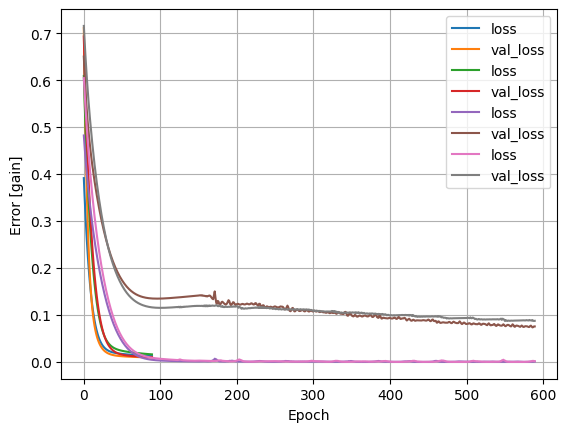

In [20]:
# base_model_25_random183 = train_ae_model(Train_25_4_random_no_out, Test_25_4_random_no_out, epochs=100)
# base_model_50_random183 = train_ae_model(Train_50_4_random_no_out, Test_50_4_random_no_out, epochs=100)
import time


# Initialize a dictionary to store each model's training time
training_times_base = {}

# Define a function to train models and record their training time
def train_model_and_record_time(model_name, train_function, train_dataset, test_dataset, epochs):
    start_time = time.time()  # Record the start time of training
    model = train_function(train_dataset, test_dataset, epochs=epochs)
    training_time = time.time() - start_time  # Calculate the training time
    training_times_base[model_name] = training_time  # Store the training time in the dictionary
    return model

# Train models and record the time
base_model_25_random183 = train_model_and_record_time(
    "base_model_25_random183", train_ae_model, Train_25_183_random, Test_25_183_random, 100)

base_model_50_random183 = train_model_and_record_time(
    "base_model_50_random183", train_ae_model, Train_50_183_random, Test_50_183_random, 100)

vgg_model_25_random183 = train_model_and_record_time(
    "vgg_model_25_random183", train_vgg_model, Train_25_183_random, Test_25_183_random, 600)

vgg_model_50_random183 = train_model_and_record_time(
    "vgg_model_50_random183", train_vgg_model, Train_50_183_random, Test_50_183_random, 600)

# # After training all models, print the training time for each model
# for model_name, time in training_times_base.items():
#     print(f"{model_name}: {time:.2f} seconds")

# After training all models, print the training time and number of trainable parameters for each model
for model_name, model in zip(training_times_base.keys(), [base_model_25_random183, base_model_50_random183, vgg_model_25_random183, vgg_model_50_random183]):
    num_trainable_params = sum(tf.size(w).numpy() for w in model.trainable_weights)
    print(f"{model_name}: {training_times_base[model_name]:.2f} seconds, {num_trainable_params} trainable parameters")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
AE model - Overall Average MAE: 0.07798347091638834
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
VGG model - Overall Average MAE: 0.2116834776962196
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


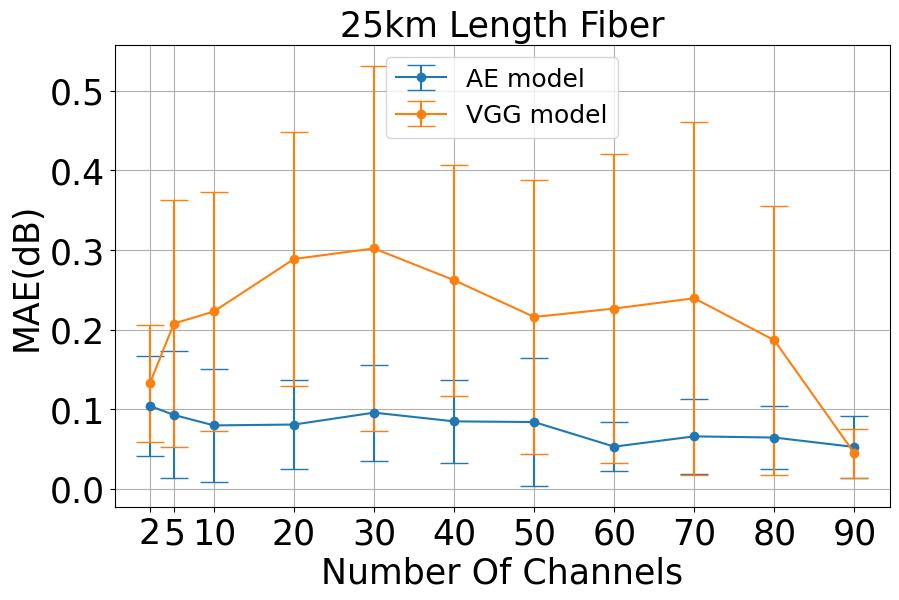

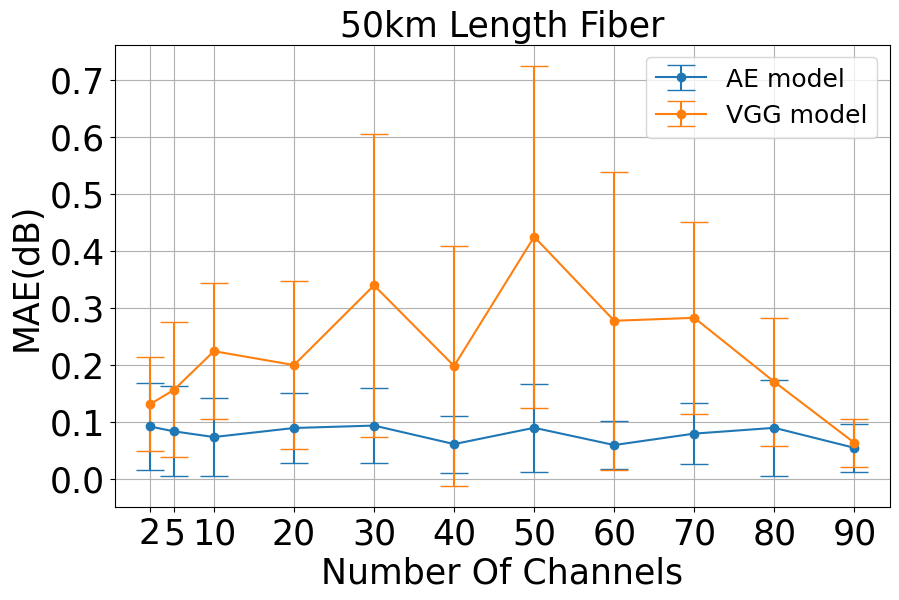

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

def evaluate_model(model, model_name, test_data):
    testData = pd.read_csv(test_data, index_col=None)
    
    # 计算每个样本的开启通道数量
    testData['num_opened_channels'] = testData.filter(like='Activated_channel_index').apply(lambda x: np.count_nonzero(x.values), axis=1)
    
    # 分离特征和实际值
    X_test = testData.drop(columns=['Raman_tilt', 'num_opened_channels'])
    y_test = testData['Raman_tilt']
    
    performances = []
    errors = []
    
    for num_channels in sorted(testData['num_opened_channels'].unique()):
        filtered_X_test = X_test[testData['num_opened_channels'] == num_channels]
        filtered_y_test = y_test[testData['num_opened_channels'] == num_channels]

        if not filtered_X_test.empty:
            y_pred = model.predict(filtered_X_test).flatten()
            
            mae = mean_absolute_error(filtered_y_test, y_pred)
            
            errors_abs = np.abs(filtered_y_test - y_pred)
            std_error = np.std(errors_abs)
            
            performances.append(mae)
            errors.append(std_error)
        else:
            performances.append(np.nan)
            errors.append(np.nan)
    
    # 计算整体平均MAE，排除nan值，并打印模型名称和对应的平均MAE
    overall_avg_mae = np.nanmean(performances)
    print(f"{model_name} - Overall Average MAE: {overall_avg_mae}")
    
    return performances, errors

# Function to plot performance evaluation results
def plot_performance(num_opened_channels, performances_1, errors_1, performances_2, errors_2, label_1, label_2, title):
    plt.figure(figsize=(10, 6))
    plt.errorbar(num_opened_channels, performances_1, yerr=errors_1, label=label_1, fmt='-o', capsize=10)
    plt.errorbar(num_opened_channels, performances_2, yerr=errors_2, label=label_2, fmt='-o', capsize=10)
    
    plt.title(title, fontsize=25)
    plt.xlabel('Number Of Channels', fontsize=25)
    plt.ylabel('MAE(dB)', fontsize=25)
    plt.xticks(num_opened_channels, fontsize=25)
    plt.yticks(fontsize=25)
    plt.legend(fontsize=18)
    plt.grid(True)
    plt.show()

# Evaluate model performance
num_opened_channels_list = [2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90]
# Evaluate two models for the 25km dataset
performances_25_1, errors_25_1 = evaluate_model(base_model_25_random183, 'AE model', CVS_prepath + Test_25_183_random + ".csv")
performances_25_2, errors_25_2 = evaluate_model(vgg_model_25_random183, 'VGG model', CVS_prepath + Test_25_183_random + ".csv")

# Evaluate two models for the 50km dataset
performances_50_1, errors_50_1 = evaluate_model(base_model_50_random183, 'AE model', CVS_prepath + Test_50_183_random + ".csv")
performances_50_2, errors_50_2 = evaluate_model(vgg_model_50_random183, 'VGG model', CVS_prepath + Test_50_183_random + ".csv")

# Plot performance evaluation results for 25km dataset
plot_performance(num_opened_channels_list, performances_25_1, errors_25_1, performances_25_2, errors_25_2, "AE model", "VGG model", "25km Length Fiber")

# Plot performance evaluation results for 50km dataset
plot_performance(num_opened_channels_list, performances_50_1, errors_50_1, performances_50_2, errors_50_2, "AE model", "VGG model", "50km Length Fiber")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


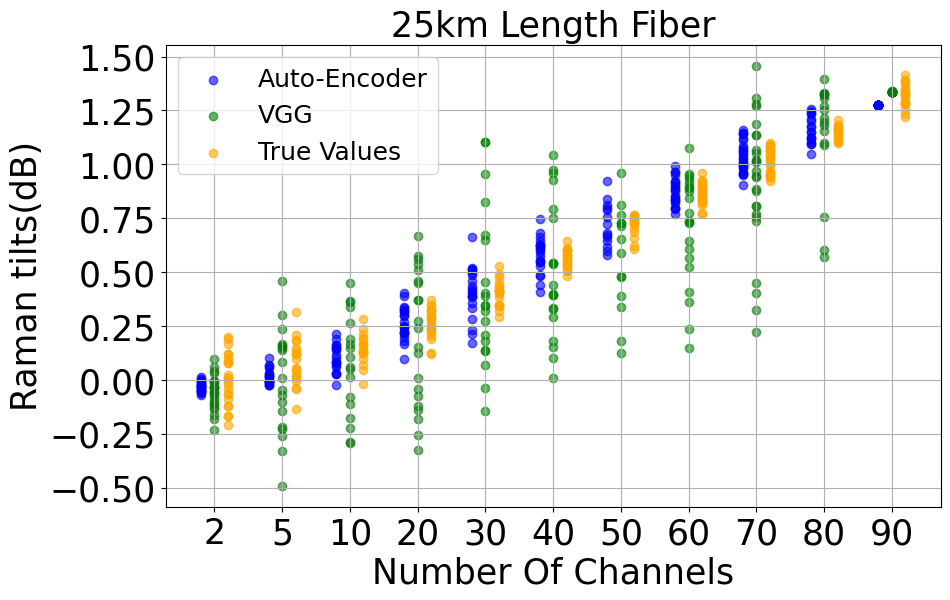

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


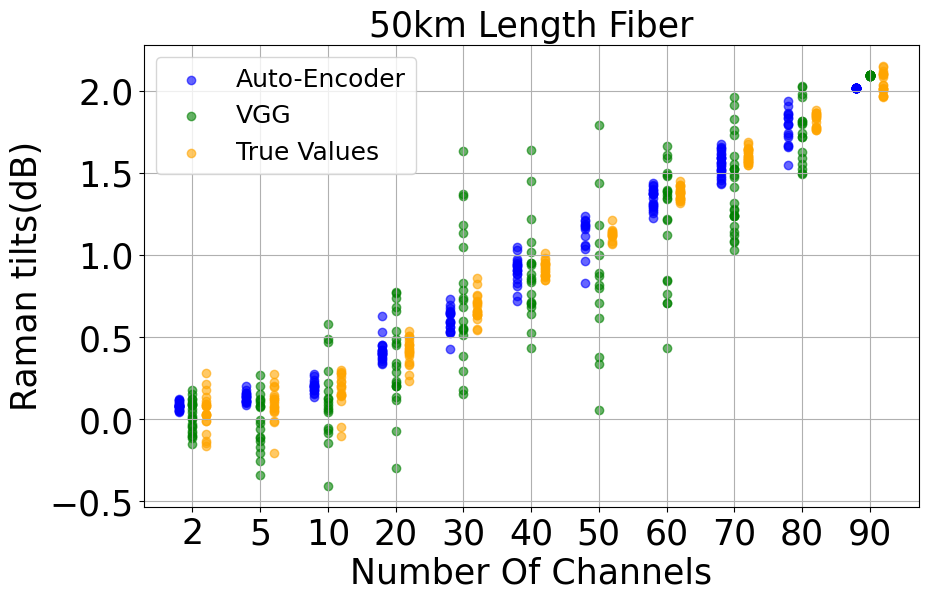

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

def extract_and_convert_true_values(test_data_path, result_labels="Raman_tilt"):
    testData = pd.read_csv(test_data_path, index_col=None)
    # 估算开启通道的数量
    testData['num_opened_channels'] = testData.filter(like='Activated_channel_index').apply(lambda x: np.count_nonzero(x.values), axis=1)
    
    # 不同通道数量的唯一值
    num_opened_channels_list = testData['num_opened_channels'].unique()

    true_values_list = []
    
    for num_channels in sorted(num_opened_channels_list):
        filtered_testData = testData[testData['num_opened_channels'] == num_channels]
        if not filtered_testData.empty:
            true_values = filtered_testData[result_labels].values.flatten()
            true_values_list.append(true_values)
        else:
            true_values_list.append([])
    
    return true_values_list

def evaluate_model(model, test_data, result_labels="Raman_tilt"):
    testData = pd.read_csv(test_data, index_col=None)
    # 估算开启通道的数量
    testData['num_opened_channels'] = testData.filter(like='Activated_channel_index').apply(lambda x: np.count_nonzero(x.values), axis=1)
    
    # 确保只有模型训练时使用的特征被包含在X_test中
    X_test = testData.drop(columns=[result_labels, 'num_opened_channels'])
    y_test = testData[result_labels]
    
    # 不同通道数量的唯一值
    num_opened_channels_list = testData['num_opened_channels'].unique()

    all_predictions = []
    all_errors = []
    
    for num_channels in sorted(num_opened_channels_list):
        filtered_X_test = X_test[testData['num_opened_channels'] == num_channels]
        filtered_y_test = y_test.loc[filtered_X_test.index]

        if not filtered_X_test.empty:
            y_pred = model.predict(filtered_X_test).flatten()
            errors_abs = np.abs(filtered_y_test.values.flatten() - y_pred)
            
            all_predictions.append(y_pred)
            all_errors.append(errors_abs)
        else:
            all_predictions.append([])
            all_errors.append([])
    
    return all_predictions, all_errors


def plot_scatter(num_opened_channels_list, predictions_list, true_values_list, labels, title):
    plt.figure(figsize=(10, 6))
    colors = ['blue', 'green', 'red', 'orange']  # Add colors to accommodate more groups of data
    offset = np.linspace(-0.2, 0.2, len(predictions_list) + 1)  # Generate offsets
    tolerance = 1e-5  # Set tolerance

    # Ensure each group of data is evenly distributed on the x-axis
    equidistant_x = np.arange(len(num_opened_channels_list))

    # Plot model prediction results
    for idx, predictions in enumerate(predictions_list):
        for i, x_pos in enumerate(equidistant_x):
            y_pred = predictions[i]
            # Filter out data points close to 0
            y_pred_filtered = y_pred[np.abs(y_pred) > tolerance]
            x_values = np.full_like(y_pred_filtered, x_pos + offset[idx])
            plt.scatter(x_values, y_pred_filtered, color=colors[idx], alpha=0.6, label=labels[idx] if i == 0 else "")

    # Plot true value data points
    for i, x_pos in enumerate(equidistant_x):
        y_true = true_values_list[i]
        # Filtering data points close to 0
        y_true_filtered = y_true[np.abs(y_true) > tolerance]
        x_values = np.full_like(y_true_filtered, x_pos + offset[-1])
        plt.scatter(x_values, y_true_filtered, color=colors[-1], alpha=0.6, label='True Values' if i == 0 else "")

    plt.title(title, fontsize=25)
    plt.xlabel('Number Of Channels', fontsize=25)
    plt.ylabel('Raman tilts(dB)', fontsize=25)
    plt.xticks(equidistant_x, labels=num_opened_channels_list, fontsize=25)
    plt.yticks(fontsize=25)
    plt.legend(fontsize=18)
    plt.grid(True)
    plt.show()

num_opened_channels_list = [2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90]

true_values_25 = extract_and_convert_true_values(CVS_prepath + Test_25_183_random + '.csv', result_labels="Raman_tilt")
true_values_50 = extract_and_convert_true_values(CVS_prepath + Test_50_183_random + '.csv', result_labels="Raman_tilt")

# Evaluate models for the 25km dataset
all_predictions_25_1, all_errors_25_1 = evaluate_model(base_model_25_random183, CVS_prepath + Test_25_183_random + '.csv')
all_predictions_25_2, all_errors_25_2 = evaluate_model(vgg_model_25_random183, CVS_prepath + Test_25_183_random + '.csv')

# Plot the scatter plot with error bars for the 25km dataset
# Evaluate models for the 25km dataset
plot_scatter(
    num_opened_channels_list, 
    [all_predictions_25_1, all_predictions_25_2], 
    true_values_25,
    ["Auto-Encoder", "VGG"], 
    "25km Length Fiber"
)

# Evaluate models for the 50km dataset
all_predictions_50_1, all_errors_50_1 = evaluate_model(base_model_50_random183, CVS_prepath + Test_50_183_random + '.csv')
all_predictions_50_2, all_errors_50_2 = evaluate_model(vgg_model_50_random183, CVS_prepath + Test_50_183_random + '.csv')

# Plot the scatter plot with error bars for the 50km dataset
plot_scatter(
    num_opened_channels_list, 
    [all_predictions_50_1, all_predictions_50_2], 
    true_values_50,
    ["Auto-Encoder", "VGG"], 
    "50km Length Fiber"
)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step


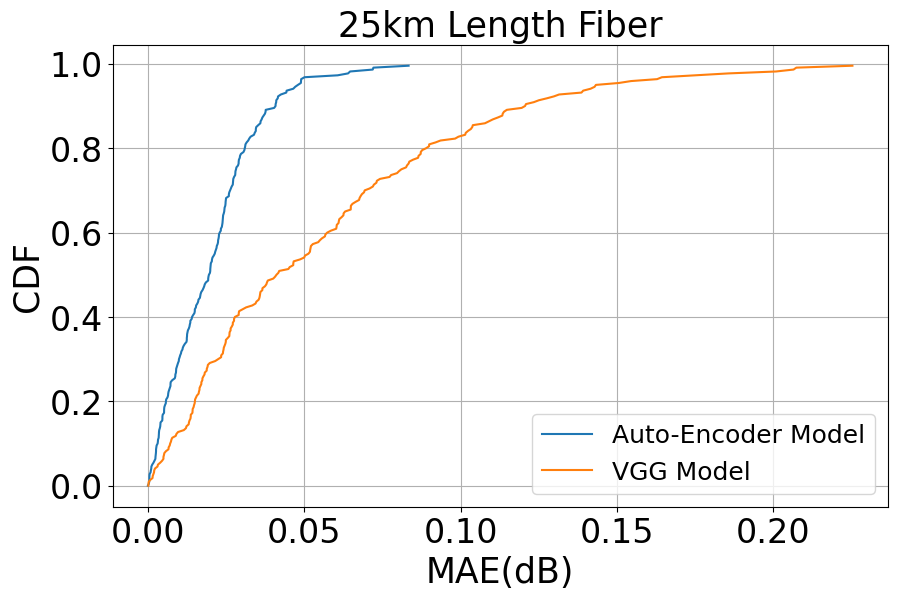

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step


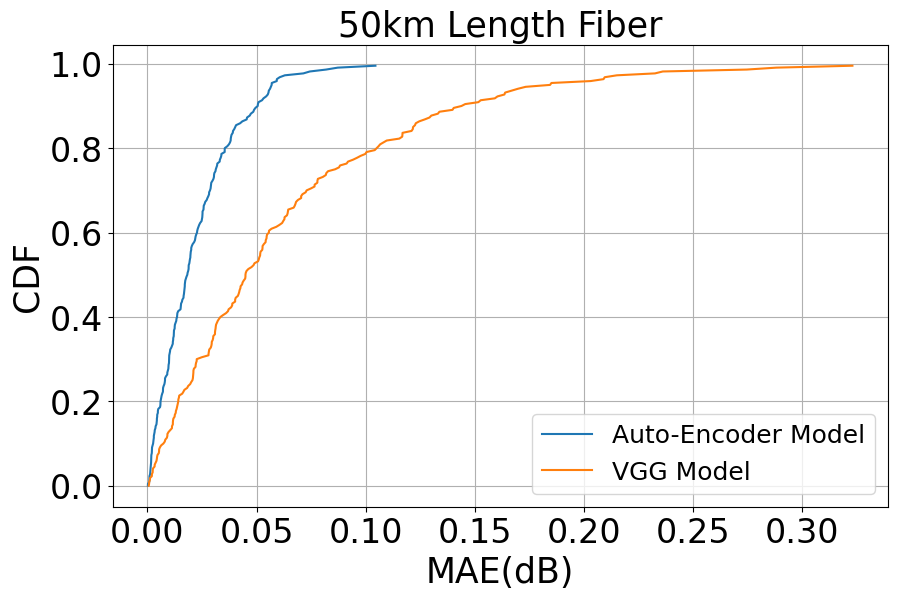

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_a_model(model, testCSV):
    X_test, y_test = getCSVData(CVS_prepath + testCSV)
    
    # Predictions
    y_pred = model.predict(X_test).flatten()
    y_pred_linear = 10 ** (y_pred / 10)

    # Ensure y_test is one-dimensional
    if y_test.ndim > 1:
        y_test = y_test.iloc[:, 0]  # Assuming y_test is a DataFrame and we're interested in the first column
            # Ensure y_test is in the correct format
        if isinstance(y_test, pd.DataFrame) or isinstance(y_test, pd.Series):
            y_test_linear = 10 ** (y_test.values.flatten() / 10)
        else:
            y_test_linear = 10 ** (y_test / 10)

    # Calculate errors
    errors = np.abs(y_test_linear - y_pred_linear)  # Using absolute error
    
    return errors
    # return errors

def plot_cdf(models, test_names, CVS_prepath, labels, dataset_type):
    plt.figure(figsize=(10, 6))
    for model, test_name, label in zip(models, test_names, labels):  # Add labels to the loop
        errors = evaluate_a_model(model, test_name)
        # Sort errors and calculate the CDF
        sorted_errors = np.sort(errors)
        yvals = np.arange(len(sorted_errors)) / float(len(sorted_errors))
        plt.plot(sorted_errors, yvals, label=label)  # Use new labels

    plt.xlabel('MAE(dB)', fontsize=25)
    plt.xticks(fontsize=24)

    plt.ylabel('CDF', fontsize=25)
    plt.yticks(fontsize=24)

    # Include the dataset type (25km or 50km) in the title
    plt.title(f'{dataset_type} Length Fiber', fontsize=25)
    plt.legend(fontsize=18)
    plt.grid(True)
    plt.show()
# Update the list of models to reflect the two models you want to verify
# For models predicting the 25km dataset
models_25 = [
    base_model_25_random183,
    vgg_model_25_random183
]
labels_25 = [
    "Auto-Encoder Model",
    "VGG Model",
]
test_names_25 = [
    Test_25_183_random + '.csv',
    Test_25_183_random + '.csv',
    # Test_25_183_random + '.csv',
]

# For models predicting the 50km dataset
models_50 = [
    base_model_50_random183,
    vgg_model_50_random183
]
labels_50 = [
    "Auto-Encoder Model",
    "VGG Model",
]
test_names_50 = [
    Test_50_183_random + '.csv',
    Test_50_183_random + '.csv',
    # Test_50_183_random + '.csv',
]

# Plot the CDF for models predicting the 25km dataset
plot_cdf(models_25, test_names_25, CVS_prepath, labels_25, "25km")

# Plot the CDF for models predicting the 50km dataset
plot_cdf(models_50, test_names_50, CVS_prepath, labels_50, "50km")

(880, 183) (880, 1)
Epoch 1/100
28/28 - 1s - 33ms/step - loss: 1.5838 - mae: 0.9446 - val_loss: 1.7335 - val_mae: 1.0795
Epoch 2/100
28/28 - 0s - 1ms/step - loss: 0.8519 - mae: 0.7053 - val_loss: 1.5258 - val_mae: 0.9782
Epoch 3/100
28/28 - 0s - 1ms/step - loss: 0.5256 - mae: 0.5938 - val_loss: 1.3263 - val_mae: 0.9102
Epoch 4/100
28/28 - 0s - 1ms/step - loss: 0.3896 - mae: 0.5383 - val_loss: 0.9395 - val_mae: 0.7768
Epoch 5/100
28/28 - 0s - 1ms/step - loss: 0.3280 - mae: 0.5030 - val_loss: 0.7169 - val_mae: 0.6855
Epoch 6/100
28/28 - 0s - 1ms/step - loss: 0.2867 - mae: 0.4729 - val_loss: 0.5634 - val_mae: 0.6115
Epoch 7/100
28/28 - 0s - 1ms/step - loss: 0.2541 - mae: 0.4447 - val_loss: 0.4460 - val_mae: 0.5478
Epoch 8/100
28/28 - 0s - 1ms/step - loss: 0.2264 - mae: 0.4180 - val_loss: 0.3590 - val_mae: 0.4952
Epoch 9/100
28/28 - 0s - 1ms/step - loss: 0.2020 - mae: 0.3928 - val_loss: 0.2930 - val_mae: 0.4517
Epoch 10/100
28/28 - 0s - 1ms/step - loss: 0.1805 - mae: 0.3692 - val_loss: 0.2

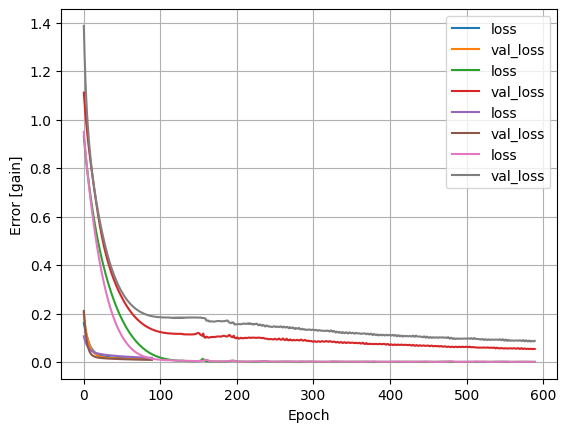

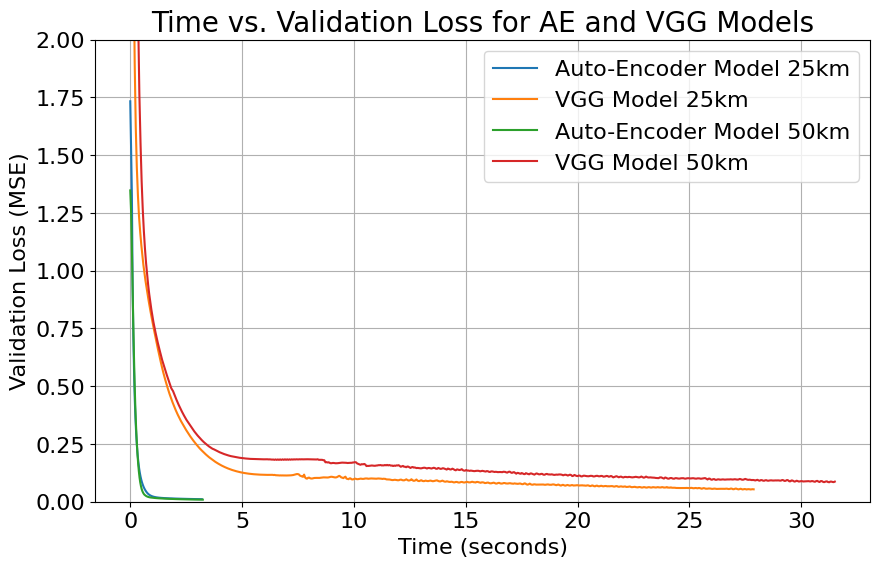

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.callbacks import Callback, EarlyStopping
import time

class TimeAndLossHistory(Callback):
    def on_train_begin(self, logs=None):
        self.times = []  # Initialize a list for timing.
        self.val_losses = []  # Initialize a list for validation losses.

    def on_epoch_end(self, epoch, logs=None):
        self.times.append(time.time())  # Record the current timestamp.
        if logs:
            self.val_losses.append(logs.get('val_loss'))  # Record the validation loss.

# model training and validation function
def integrate_and_validate_models():
    # Update the names list of training and testing sets to match the models along with their respective training functions
    train_test_pairs = [
        (train_ae_model, Train_25_183_random, Test_25_183_random, 100),
        (train_vgg_model, Train_25_183_random, Test_25_183_random, 600),
        (train_ae_model, Train_50_183_random, Test_50_183_random, 100),
        (train_vgg_model, Train_50_183_random, Test_50_183_random, 600),
    ]

    time_loss_per_model = []

    for train_function, train_name, test_name, epochs in train_test_pairs:
        time_and_loss_history = TimeAndLossHistory()
        callbacks = [time_and_loss_history]

        model = train_function(train_name, test_name, epochs, callbacks=callbacks)
        
        time_loss_per_model.append((time_and_loss_history.times, time_and_loss_history.val_losses))
    
    # Plotting
    plt.figure(figsize=(10, 6))
    labels = [
        "Auto-Encoder Model 25km",
        "VGG Model 25km",
        "Auto-Encoder Model 50km",
        "VGG Model 50km",
    ]

    # Plot the curve of computation time against validation loss for each model
    for i, (times, val_losses) in enumerate(time_loss_per_model):
        relative_times = [t - times[0] for t in times]  # Calculate relative time
        plt.plot(relative_times, val_losses, label=labels[i])

    plt.xlabel('Time (seconds)', fontsize=16)
    plt.xticks(fontsize=16)
    plt.ylabel('Validation Loss (MSE)', fontsize=16)
    plt.yticks(fontsize=16)
    plt.ylim(0, 2)
    plt.title('Time vs. Validation Loss for AE and VGG Models', fontsize=20)
    plt.legend(fontsize=16)
    plt.grid(True)
    plt.show()

# Call the function to integrate models and perform validation
integrate_and_validate_models()
